# 練習
Let's restore a damaged image
In this exercise, we'll restore an image that has missing parts in it, using the inpaint_biharmonic() function.

We'll work on an image from the data module, obtained by data.astronaut(). Some of the pixels have been replaced by 1s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 1s turns them totally black. The defective image is saved as an array called defect_image.

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas.

Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.

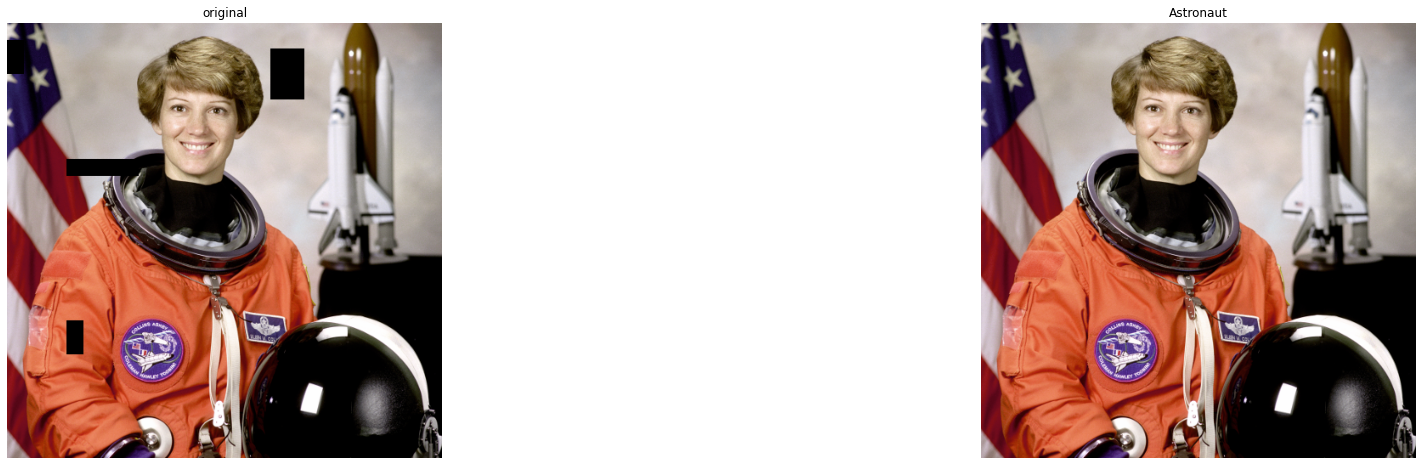

In [2]:
%matplotlib inline
# 準備作業
import matplotlib.pyplot as plt
def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(32,8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
    
import ast
import numpy as np
from skimage import data
## scikit-image = 0.17.2
## scipy == 1.4.1
with open('defect_image.txt') as f:
    defect_image = np.array(ast.literal_eval(f.read()), dtype='uint8')

with open('mask.txt') as f:
    mask = np.array(ast.literal_eval(f.read()), dtype='uint8')
    
plot_comparision(defect_image, data.astronaut(), 'Astronaut')

# From scikit-image, import the module restoration and the inpaint function.
# Show the defective image using show_image().

In [5]:
mask.shape, data.astronaut().shape, mask.min(), mask.max()

((512, 512), (512, 512, 3), 0, 1)

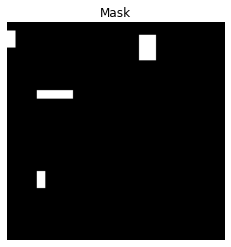

In [4]:
# Mask 就是黑底白色 標示出那些地方毀損
show_image(mask, title='Mask', cmap_type='gray', interpolation=None)

In [6]:
#--修復影像 注意defect_image 使用 uint8
defect_image.dtype

dtype('uint8')

In [7]:
import skimage
skimage.__file__

'/usr/local/lib/python3.7/dist-packages/skimage/__init__.py'

In [8]:
!ls /usr/local/lib/python3.7/dist-packages/skimage/ -rtl

total 104
-rw-r--r-- 1 root root  960 Aug 31 13:56 setup.py
-rw-r--r-- 1 root root 4547 Aug 31 13:56 __init__.py
-rw-r--r-- 1 root root  179 Aug 31 13:56 conftest.py
-rw-r--r-- 1 root root 2979 Aug 31 13:56 _build.py
drwxr-xr-x 9 root root 4096 Aug 31 13:56 viewer
drwxr-xr-x 4 root root 4096 Aug 31 13:56 util
drwxr-xr-x 4 root root 4096 Aug 31 13:56 transform
drwxr-xr-x 4 root root 4096 Aug 31 13:56 _shared
drwxr-xr-x 4 root root 4096 Aug 31 13:56 segmentation
drwxr-xr-x 3 root root 4096 Aug 31 13:56 scripts
drwxr-xr-x 4 root root 4096 Aug 31 13:56 restoration
drwxr-xr-x 3 root root 4096 Aug 31 13:56 registration
drwxr-xr-x 2 root root 4096 Aug 31 13:56 __pycache__
drwxr-xr-x 4 root root 4096 Aug 31 13:56 morphology
drwxr-xr-x 4 root root 4096 Aug 31 13:56 metrics
drwxr-xr-x 4 root root 4096 Aug 31 13:56 measure
drwxr-xr-x 5 root root 4096 Aug 31 13:56 io
drwxr-xr-x 4 root root 4096 Aug 31 13:56 graph
drwxr-xr-x 4 root root 4096 Aug 31 13:56 future
drwxr-xr-x 5 root root 4096 Aug 31 13

In [9]:
!ls /usr/local/lib/python3.7/dist-packages/skimage/restoration/inpaint.py -rtl

-rw-r--r-- 1 root root 5176 Aug 31 13:56 /usr/local/lib/python3.7/dist-packages/skimage/restoration/inpaint.py


In [10]:
!cat /usr/local/lib/python3.7/dist-packages/skimage/restoration/inpaint.py


import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import scipy.ndimage as ndi
from scipy.ndimage.filters import laplace
import skimage
from ..measure import label


def _get_neighborhood(nd_idx, radius, nd_shape):
    bounds_lo = (nd_idx - radius).clip(min=0)
    bounds_hi = (nd_idx + radius + 1).clip(max=nd_shape)
    return bounds_lo, bounds_hi


def _inpaint_biharmonic_single_channel(mask, out, limits):
    # Initialize sparse matrices
    matrix_unknown = sparse.lil_matrix((np.sum(mask), out.size))
    matrix_known = sparse.lil_matrix((np.sum(mask), out.size))

    # Find indexes of masked points in flatten array
    mask_i = np.ravel_multi_index(np.where(mask), mask.shape)

    # Find masked points and prepare them to be easily enumerate over
    mask_pts = np.stack(np.where(mask), axis=-1)

    # Iterate over masked points
    for mask_pt_n, mask_pt_idx in enumerate(mask_pts):
        # Get bounded neighborhood of selected radius
        b_lo, b

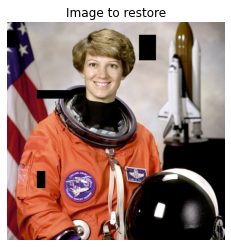

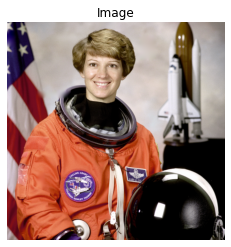

In [11]:
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')
#inpaint.inpaint_biharmonic?
# Apply the restoration function to the image using the mask
#                                           壞掉圖片      壞在哪裡
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

show_image(restored_image)

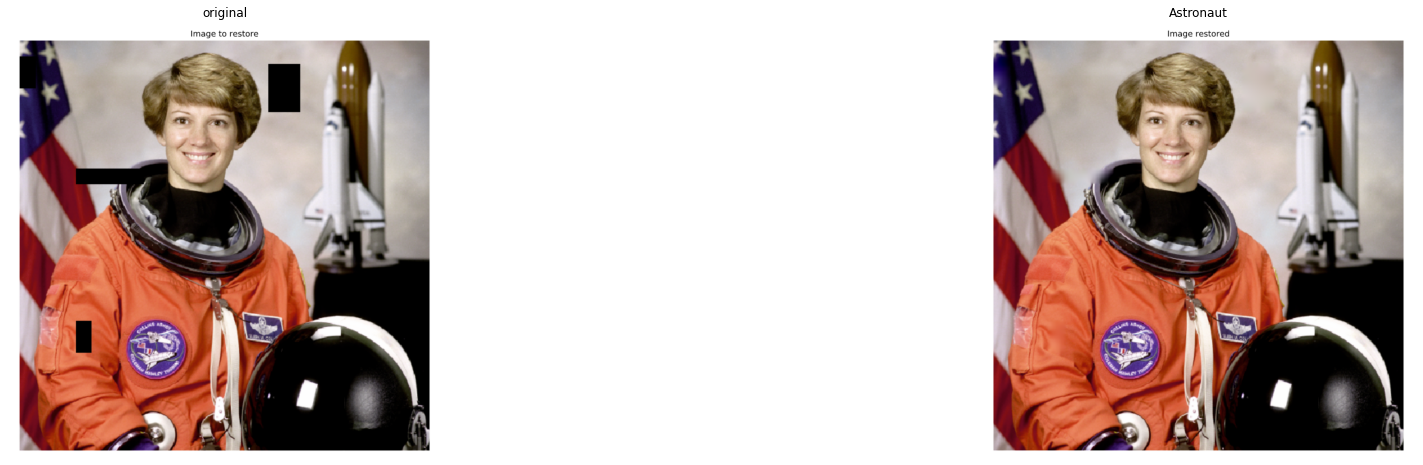

In [15]:
# 預期結果

original, restoration = plt.imread('Image to restore.png'), \
                     plt.imread('Image restored - astronaut.png')

plot_comparision(original, restoration, 'Astronaut')

# 練習
Removing logos
As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

Landscape with small datacamp logo
Image loaded as image_with_logo.
You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

![image.png](attachment:image.png)

In [17]:
# 準備事項

# Initialize a mask with the same shape as the image, using np.zeros().
# In the mask, set the region that will be inpainted to 1 .
# Apply inpainting to image_with_logo using the mask.

with open('image_with_logo.txt') as f:
    image_with_logo = np.array(ast.literal_eval(f.read()), dtype='uint8')

image_with_logo.shape

(296, 512, 3)

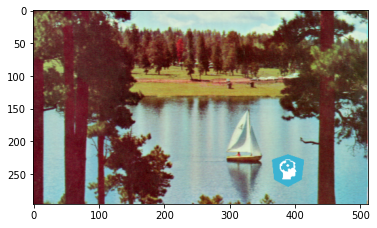

In [18]:
plt.imshow(image_with_logo)
plt.show()

In [20]:
image_with_logo.shape[:-1]

(296, 512)

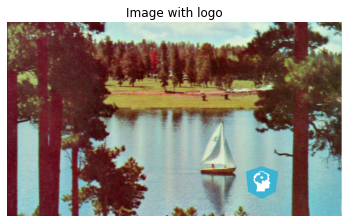

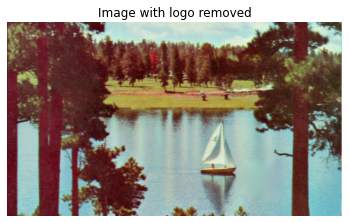

In [25]:
# Initialize the mask
import numpy as np
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

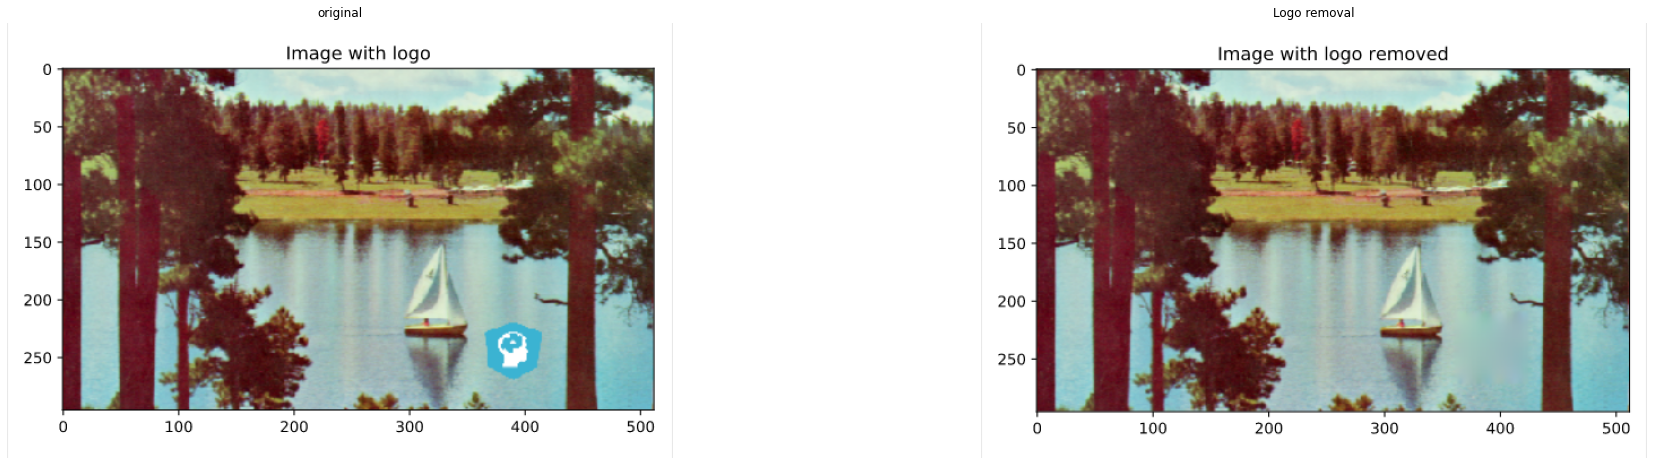

In [ ]:
# 預期結果

original, restoration = plt.imread('Image with logo.png'), \
                     plt.imread('Image with logo removed.png')

plot_comparision(original, restoration, 'Logo removal')